# Support Vector Machine (SVM) in Detail

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm widely used for classification and regression tasks. It excels in high-dimensional spaces and is applied in domains like image recognition, text classification, and bioinformatics.

---

SVM aims to find the best decision boundary that separates different classes in an **n-dimensional space**.

## **What is a Support Vector Machine (SVM)?**
- SVM is a machine learning algorithm that finds the optimal **hyperplane** to separate data points of different classes with the maximum margin. 
- The hyperplane is chosen to maximize the **margin**, which is the distance between the hyperplane and the nearest data points from each class, known as **support vectors**. 
- When data is not linearly separable, SVM uses the **kernel trick** to transform it into a higher-dimensional space where a linear boundary can be established.

## Why is it called Support Vector Machine?
- SVM selects **extreme data points (vectors)** that define the decision boundary.
- These data points are known as **Support Vectors**.
- The model is named **Support Vector Machine** because these vectors help construct the hyperplane.

### **Why Use SVM?**
- **Maximizes Margin**: Robust to noise and outliers due to its focus on the widest separation.
- **Versatility**: Handles linear and non-linear problems via kernels.
- **High-Dimensional Efficiency**: Excels in datasets with many features (e.g., text classification).
- **Strong Theoretical Foundation**: Rooted in optimization and geometry.

### **How It Works**
1. **Hyperplane**: A decision boundary separating classes (e.g., a line in 2D, a plane in 3D).
2. **Support Vectors**: Data points closest to the hyperplane that define its position and orientation.
3. The **optimal hyperplane** is chosen by maximizing the margin (distance between support vectors and the hyperplane).
4. **Margin**: The distance between the hyperplane and the support vectors. SVM maximizes this margin for better generalization.
5. **Kernel Trick**: A technique to handle non-linear data by mapping it to a higher-dimensional space.

---

## **2. Key Concepts and Methods**

### Types of SVM
1. Linear SVM: Used when data is linearly separable, meaning a straight line (or hyperplane) can separate the classes.

2. Non-Linear SVM: Used when data is not linearly separable. It employs kernel functions to transform the data into a space where it becomes linearly separable.

3. Support Vector Regression (SVR): An extension of SVM for regression tasks, aiming to fit a function within a margin of tolerance around the target values.

### Kernel Functions
Kernel functions transform data into higher dimensions. Common options include:

1. **Linear Kernel**: For linearly separable data (`kernel='linear'`). \( K(x, x') = x^T x' \) (simple dot product).
2. **Polynomial Kernel**: Captures polynomial relationships (`kernel='poly'`). \( K(x, x') = (x^T x' + c)^d \) (captures interactions).
3. **Radial Basis Function (RBF) Kernel**: Handles complex, non-linear patterns (`kernel='rbf'`). \( K(x, x') = \exp(-\gamma \|x - x'\|^2) \) (non-linear, default).
4. **Sigmoid Kernel**: Mimics neural network behavior (`kernel='sigmoid'`). \( K(x, x') = \tanh(\gamma x^T x' + c) \).

### **c. Hyperparameters**
- `C`: Regularization parameter (small \(C\) = larger margin, more errors; large \(C\) = smaller margin, fewer errors).
- `kernel`: Type of kernel (e.g., "linear", "rbf").
- `gamma`: Kernel coefficient for RBF/polynomial (small = broader influence, large = tighter fit).

---

## SVM for Classification

### Binary Classification
In binary classification, SVM finds the hyperplane that best separates two classes by maximizing the margin.

### Multi-Class Classification
For problems with more than two classes, SVM uses strategies like:

1. **One-vs-One (OvO)**: Trains a classifier for each pair of classes.
2. **One-vs-All (OvA)**: Trains a classifier for each class against all others.

---

## SVM for Regression

In **Support Vector Regression (SVR)**, the goal is to predict continuous values by finding a function that keeps most data points within a specified margin (controlled by the parameter `epsilon`).

---
## Advantages of SVM

- **High-Dimensional Effectiveness**: Performs well with many features.
- **Robustness**: Less prone to overfitting with proper regularization.
- **Versatility**: Handles both linear and non-linear data via kernels.

## Disadvantages of SVM

- **Computationally Intensive**: Slow training on large datasets.
- **Kernel Selection**: Choosing the right kernel and parameters is tricky.
- **Interpretability**: Less intuitive than models like decision trees.

---

# Example 1: SVM for Classification (Iris Dataset)

Let’s classify the Iris dataset using SVM with a linear kernel.

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Step 2: Load and Prepare Data

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use first two features (sepal length, sepal width) for visualization
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3: Train the SVM Model

In [3]:
# Create and train an SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

- `C`: Regularization parameter (smaller values increase the margin, larger values reduce it).

## Step 4: Make Predictions and Evaluate

In [4]:
# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



## Step 5: Visualize the Decision Boundary

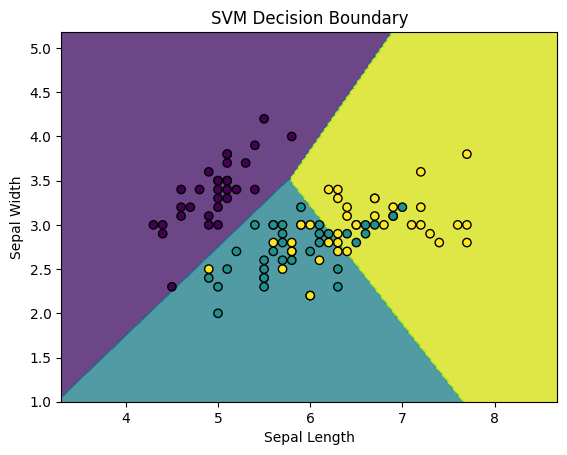

In [5]:
def plot_decision_boundary(X, y, model):
    h = .02  # Step size for mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot
plot_decision_boundary(X_train, y_train, svm_clf)

This code visualizes how SVM separates the three Iris classes based on sepal length and width.

---

# Example 2: SVM for Regression (Boston Housing Dataset)

Let’s predict house prices using SVR with an RBF kernel.

## Step 1: Import Libraries

In [6]:
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Step 2: Load and Prepare Data

In [ ]:
# Load the Boston Housing dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3: Train the SVR Model

In [ ]:
# Create and train an SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

- `epsilon`: Defines the margin of tolerance where no penalty is given to errors.

## Step 4: Make Predictions and Evaluate

In [ ]:
# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

---

## Hyperparameter Tuning

SVM performance depends on parameters like:
- `C`: Controls the trade-off between margin maximization and classification error.
- `gamma`: Defines the influence of a single training example (RBF kernel).
- `kernel`: Determines the type of transformation.

### Example: Grid Search for Classification

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

# Create SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Test the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Test Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))

---

## **4. Tools and Methods Summary**
- **Modeling**: `sklearn.svm.SVC`, `SVR`.
- **Evaluation**: `sklearn.metrics.accuracy_score`, `mean_squared_error`.
- **Tuning**: `sklearn.model_selection.GridSearchCV`.
- **Visualization**: `matplotlib.pyplot.contourf()`, `seaborn.scatterplot()`.

---

In [ ]:
from sklearn.metrics import classification_report

# Detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

---

## **Key Considerations**
- **Kernel Choice**: Linear for separable data, RBF/polynomial for non-linear.
- **Parameter Tuning**: \(C\) (trade-off between margin and errors), `gamma` (kernel shape).
- **Feature Scaling**: Critical—SVM is sensitive to feature magnitude.
- **Computational Cost**: Scales poorly with large datasets (\(O(n^2)\) or worse).

#### **Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {"C": [0.1, 1, 10], "gamma": ["scale", "auto", 0.1], "kernel": ["linear", "rbf"]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

#### **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_rbf.fit(X_train_scaled, y_train)

---